In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
csv =pd.read_csv("/content/drive/MyDrive/Datasets/imdb_data.csv")
df =pd.DataFrame(csv)

In [93]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


In [95]:
df.count()

id                3348
primaryTitle      3348
originalTitle     3348
isAdult           3348
runtimeMinutes    3348
genres            3348
averageRating     3348
numVotes          3348
budget            3348
gross             3297
release_date      3343
directors         3348
dtype: int64

In [96]:
df.drop(["id","primaryTitle","isAdult","runtimeMinutes","release_date","originalTitle","genres","directors"],axis=1,inplace=True)

In [97]:
(df['gross'].isnull().sum()/len(df))*100

1.5232974910394266

In [98]:
df['budget'].corr(df['gross'])

0.6983972379343112

In [99]:
df=df.dropna(subset=['gross'])

In [100]:
df.isnull().any()

averageRating    False
numVotes         False
budget           False
gross            False
dtype: bool

In [101]:
df.head()

,averageRating,numVotes,budget,gross
0,6.4,87925,48000000,76019048.0
1,7.1,111758,4000000,35459543.0
2,7.6,52628,4000000,5200000.0
3,7.4,75784,3500000,81600000.0
4,7.9,106476,12000000,61749765.0


In [102]:
df["averageRating"].describe()

count    3297.000000
mean        6.741735
std         0.881274
min         1.000000
25%         6.200000
50%         6.800000
75%         7.300000
max         9.300000
Name: averageRating, dtype: float64

In [103]:
df["hit"]=df['averageRating'].apply(lambda x: 1 if x > 6.7 else 0)

In [104]:
df.head()

,averageRating,numVotes,budget,gross,hit
0,6.4,87925,48000000,76019048.0,0
1,7.1,111758,4000000,35459543.0,1
2,7.6,52628,4000000,5200000.0,1
3,7.4,75784,3500000,81600000.0,1
4,7.9,106476,12000000,61749765.0,1


In [105]:
df['hit'].count().sum()

3297

In [108]:
df["money_loss"]=np.where(df["gross"] < df['budget'],1,0)

In [109]:
df[(df["money_loss"] == 0) & (df["hit"] == 0)]

,averageRating,numVotes,budget,gross,hit,money_loss
0,6.4,87925,48000000,76019048.0,0,0
5,6.6,53906,777000,2437000.0,0,0
7,6.5,112043,7200000,43829933.0,0,0
24,6.7,113277,7000000,35382710.0,0,0
39,6.7,111025,7000000,20972000.0,0,0
...,...,...,...,...,...,...
3327,6.7,60145,10000000,26404660.0,0,0
3328,5.1,62714,129000000,395000317.0,0,0
3330,5.9,73523,22000000,77411570.0,0,0
3332,6.1,59401,104000000,129288072.0,0,0


In [110]:
df["performance"] = np.where((df["hit"] == 1) & (df["money_loss"] == 0), 1, 0)


In [111]:
df.head()

,averageRating,numVotes,budget,gross,hit,money_loss,performance
0,6.4,87925,48000000,76019048.0,0,0,0
1,7.1,111758,4000000,35459543.0,1,0,1
2,7.6,52628,4000000,5200000.0,1,0,1
3,7.4,75784,3500000,81600000.0,1,0,1
4,7.9,106476,12000000,61749765.0,1,0,1


In [112]:
df["performance"].value_counts()

0    1845
1    1452
Name: performance, dtype: int64

In [114]:
X=df.drop(["performance"],axis=1)

In [115]:
Y=df["performance"]

In [116]:
X.shape

(3297, 6)

In [117]:
Y.shape

(3297,)

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [119]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,train_size=0.2,random_state=10)

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
data = {'accuracy': [],
        'accuracy_scaled': [],
        'r2_score': [],
        'r2_score_scaled': [],
        'mse': [],
        'mse_scaled': []}

model1 = []
model2 = []
m=0
for i in range(3, 10):
    model1.append(KNeighborsClassifier(n_neighbors=i))
    model2.append(KNeighborsClassifier(n_neighbors=i))
    model1[m].fit(X_train_scaled, y_train)
    model2[m].fit(X_train, y_train)
    y_pred_scaled = model1[m].predict(X_test_scaled)
    y_pred = model2[m].predict(X_test)
    m=m+1
    accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    r2_score_scaled = r2_score(y_test, y_pred_scaled)
    r2_score_unscaled = r2_score(y_test, y_pred)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    mse_unscaled = mean_squared_error(y_test, y_pred)
    data['accuracy_scaled'].append(accuracy_scaled)
    data['accuracy'].append(accuracy)
    data['r2_score_scaled'].append(r2_score_scaled)
    data['r2_score'].append(r2_score_unscaled)
    data['mse_scaled'].append(mse_scaled)
    data['mse'].append(mse_unscaled)

In [150]:
df2=pd.DataFrame(data)

In [151]:
df2

,accuracy,accuracy_scaled,r2_score,r2_score_scaled,mse,mse_scaled
0,0.617513,1.000000,-0.548925,1.00000,0.382487,0.000000
1,0.619409,1.000000,-0.541249,1.00000,0.380591,0.000000
2,0.629644,1.000000,-0.499801,1.00000,0.370356,0.000000
3,0.623199,1.000000,-0.525898,1.00000,0.376801,0.000000
4,0.632297,1.000000,-0.489056,1.00000,0.367703,0.000000
5,0.621683,0.999242,-0.532039,0.99693,0.378317,0.000758
6,0.645565,0.999242,-0.435327,0.99693,0.354435,0.000758


from matplotlib import pyplot as plt
df2['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['accuracy_scaled'].plot(kind='hist', bins=20, title='accuracy_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['r2_score'].plot(kind='hist', bins=20, title='r2_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['r2_score_scaled'].plot(kind='hist', bins=20, title='r2_score_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='accuracy', y='accuracy_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='accuracy_scaled', y='r2_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='r2_score', y='r2_score_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='r2_score_scaled', y='mse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mse_scaled']
  ys = series['accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('mse_scaled', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse_scaled')
_ = plt.ylabel('accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mse_scaled']
  ys = series['accuracy_scaled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('mse_scaled', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse_scaled')
_ = plt.ylabel('accuracy_scaled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mse_scaled']
  ys = series['r2_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('mse_scaled', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse_scaled')
_ = plt.ylabel('r2_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mse_scaled']
  ys = series['r2_score_scaled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('mse_scaled', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse_scaled')
_ = plt.ylabel('r2_score_scaled')

from matplotlib import pyplot as plt
df2['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['accuracy_scaled'].plot(kind='line', figsize=(8, 4), title='accuracy_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['r2_score'].plot(kind='line', figsize=(8, 4), title='r2_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['r2_score_scaled'].plot(kind='line', figsize=(8, 4), title='r2_score_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

In [156]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

1.0

In [161]:
X.head()

,averageRating,numVotes,budget,gross,hit,money_loss
0,6.4,87925,48000000,76019048.0,0,0
1,7.1,111758,4000000,35459543.0,1,0
2,7.6,52628,4000000,5200000.0,1,0
3,7.4,75784,3500000,81600000.0,1,0
4,7.9,106476,12000000,61749765.0,1,0


from matplotlib import pyplot as plt
_df_0['averageRating'].plot(kind='hist', bins=20, title='averageRating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['numVotes'].plot(kind='hist', bins=20, title='numVotes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['budget'].plot(kind='hist', bins=20, title='budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['gross'].plot(kind='hist', bins=20, title='gross')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='averageRating', y='numVotes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='numVotes', y='budget', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='budget', y='gross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='gross', y='hit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hit']
  ys = series['averageRating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('hit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hit')
_ = plt.ylabel('averageRating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hit']
  ys = series['numVotes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('hit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hit')
_ = plt.ylabel('numVotes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hit']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('hit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hit')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hit']
  ys = series['gross']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('hit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hit')
_ = plt.ylabel('gross')

from matplotlib import pyplot as plt
_df_12['averageRating'].plot(kind='line', figsize=(8, 4), title='averageRating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['numVotes'].plot(kind='line', figsize=(8, 4), title='numVotes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['budget'].plot(kind='line', figsize=(8, 4), title='budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['gross'].plot(kind='line', figsize=(8, 4), title='gross')
plt.gca().spines[['top', 'right']].set_visible(False)

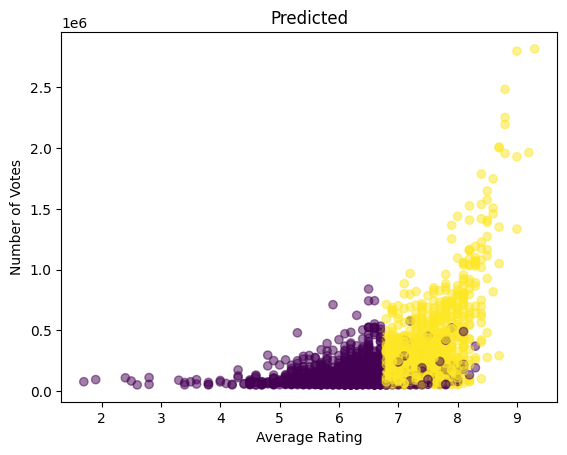

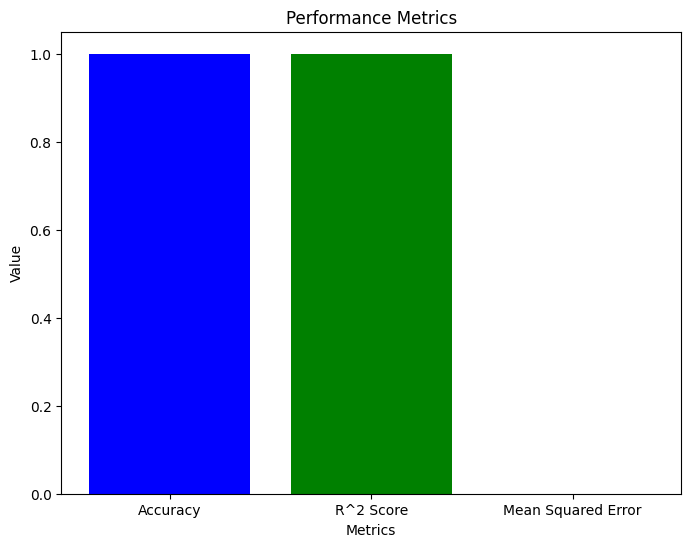

In [181]:
plt.scatter(X_test["averageRating"], X_test["numVotes"], c=y_pred,alpha=0.5)
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")
plt.title("Predicted")
plt.show()